##### Exploratory Data Analysis (EDA) for Foreign Doctors in Germany between (1991 - 2022):

The dataset has been extracted from the German Federanl Health Reporting website[1]. The orignal source of the data is the German Medical Association.

1. Importing nessecary packages

In [195]:
# Necessary packages are imported.

# Importing pandas library to work with the datasets.
import json
import pandas as pd
import numpy as np
import seaborn as sbn
import plotly.io as pio
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
pio.renderers.default = "vscode"

2. Reading the 'AllCountriesData' dataset as a dataframe.

In [150]:
# Defining WorldData variable as placeholder for the dataset.
WorldData = pd.read_csv('AllCountriesData.csv')

#Set the maximum number of rows and columns to be displayed when printing WorldData.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# printing fisrt five rows of WorldData Dataset.
WorldData.head(5)

,Unnamed: 0,Country,1991,1992,1993,1994,1995,199,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Egypt,111.0,124.0,118.0,121.0,110.0,122.0,124.0,114.0,119.0,108.0,120.0,134.0,124.0,126.0,131.0,138.0,150.0,161.0,186.0,228.0,289.0,429.0,580.0,778.0,903.0,1049.0,1226.0,1361.0,1549.0,1698.0,1717.0,1767.0
1,2,Algeria,9.0,8.0,10.0,12.0,14.0,19.0,20.0,28.0,32.0,27.0,27.0,27.0,28.0,30.0,29.0,24.0,22.0,21.0,21.0,23.0,22.0,19.0,27.0,34.0,42.0,52.0,69.0,108.0,135.0,205.0,276.0,337.0
2,3,Angola,1.0,7.0,8.0,7.0,9.0,7.0,8.0,7.0,8.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0
3,4,Equatorial Guinea,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Ethiopia,61.0,72.0,83.0,84.0,72.0,63.0,51.0,50.0,46.0,42.0,45.0,39.0,43.0,41.0,35.0,39.0,41.0,43.0,38.0,38.0,34.0,32.0,26.0,28.0,34.0,31.0,33.0,32.0,33.0,35.0,30.0,26.0


3. Viewing all the columns of the dataset

In [151]:
# The function .columns is used to view all column headrs.
WorldData.columns

Index(['Unnamed: 0', 'Country', '1991', '1992', '1993', '1994', '1995', '199',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

4. Deleting the any unnecessary columns, in this case the 'Unnamed' column.

In [152]:
# As seen from the column headers, the column 'Unnamed: 0' is unnecessary therefor it should be deleted.
# Drop the "Unnamed: 0" on the column axis.
WorldData = WorldData.drop("Unnamed: 0", axis='columns')

5. Viewing the number of rows and columns of the WorldData dataset which are (167, 33)

In [153]:
# Print dataset dimensions
WorldData.shape

(167, 33)

6. Ordering the WorldData in descending order based on the '2022' column.

   Furthermore, displaying the top ten countries of orign of doctors in Germany.
    
   As shown Syrian Arab Republic came in first place, followed by Romania and Greece respectivly.

In [184]:
# As seen from the "2022" column, the values are not ordered descendingly. 
# The .sort function is used to order the "2022" column values in descending order.
World_Top_Ten = WorldData.sort_values("2022", ascending=False)

# view the 
World_Top_Ten.head(10)

,Country,1991,1992,1993,1994,1995,199,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
71,Syrian Arab Republic,349.0,407.0,426.0,431.0,429.0,428.0,407.0,422.0,420.0,434.0,455.0,482.0,496.0,524.0,565.0,608.0,665.0,707.0,775.0,867.0,997.0,1165.0,1337.0,1656.0,2149.0,2895.0,3632.0,4156.0,4732.0,5289.0,5404.0,5638.0
139,Romania,379.0,422.0,450.0,456.0,498.0,526.0,514.0,524.0,531.0,540.0,543.0,585.0,635.0,660.0,692.0,718.0,824.0,927.0,1112.0,1495.0,2105.0,2910.0,3454.0,3857.0,4062.0,4285.0,4505.0,4666.0,4785.0,4916.0,4721.0,4695.0
127,Greece,752.0,773.0,783.0,800.0,816.0,864.0,890.0,882.0,908.0,954.0,1014.0,1083.0,1162.0,1265.0,1357.0,1453.0,1554.0,1708.0,1863.0,2016.0,2224.0,2556.0,2847.0,3011.0,3017.0,3119.0,3147.0,3169.0,3216.0,3123.0,2973.0,2972.0
136,Austria,306.0,344.0,359.0,365.0,395.0,460.0,487.0,474.0,553.0,592.0,678.0,792.0,958.0,1130.0,1269.0,1438.0,1613.0,1802.0,2018.0,2173.0,2363.0,2491.0,2611.0,2695.0,2573.0,2600.0,2642.0,2687.0,2736.0,2786.0,2901.0,2943.0
158,Russia/Former Soviet Union,265.0,464.0,659.0,728.0,916.0,1058.0,1174.0,1191.0,1320.0,1415.0,1484.0,1598.0,1696.0,1591.0,1572.0,1616.0,1624.0,1685.0,1746.0,1711.0,1735.0,1814.0,1897.0,1996.0,2149.0,2257.0,2395.0,2535.0,2685.0,2781.0,2784.0,2902.0
164,Ukraine,0.0,0.0,0.0,26.0,38.0,84.0,129.0,155.0,218.0,267.0,346.0,490.0,605.0,668.0,730.0,740.0,777.0,817.0,823.0,856.0,872.0,922.0,1002.0,1091.0,1176.0,1336.0,1485.0,1637.0,1798.0,1929.0,2014.0,2164.0
163,Turkey,683.0,693.0,726.0,733.0,729.0,739.0,737.0,710.0,733.0,726.0,773.0,829.0,865.0,878.0,905.0,919.0,884.0,905.0,925.0,903.0,900.0,922.0,924.0,954.0,995.0,1052.0,1148.0,1273.0,1434.0,1607.0,1802.0,2160.0
137,Poland,576.0,581.0,607.0,637.0,647.0,683.0,664.0,675.0,675.0,683.0,685.0,734.0,919.0,1086.0,1171.0,1283.0,1332.0,1428.0,1499.0,1551.0,1636.0,1759.0,1830.0,1936.0,1987.0,2038.0,2084.0,2139.0,2163.0,2179.0,2106.0,2127.0
161,Serbia/former Yugoslavia,481.0,494.0,498.0,514.0,530.0,525.0,514.0,483.0,515.0,519.0,520.0,517.0,512.0,372.0,367.0,378.0,366.0,378.0,371.0,356.0,390.0,491.0,611.0,769.0,968.0,1192.0,1421.0,1566.0,1732.0,1931.0,2040.0,2101.0
122,Bulgaria,190.0,211.0,221.0,215.0,235.0,233.0,245.0,224.0,226.0,231.0,226.0,246.0,308.0,349.0,365.0,393.0,462.0,541.0,652.0,770.0,927.0,1111.0,1277.0,1427.0,1554.0,1634.0,1715.0,1774.0,1834.0,1883.0,1947.0,1975.0


7. However, when displaying the top 30 countries of orign of doctors in Germany, Libya came 23.

In [155]:
World_Top_Ten = World_Top_Ten[['Country', '2022']]
World_Top_Ten = World_Top_Ten.head(30)

World_Top_Ten

,Country,2022
71,Syrian Arab Republic,5638.0
139,Romania,4695.0
127,Greece,2972.0
136,Austria,2943.0
158,Russia/Former Soviet Union,2902.0
164,Ukraine,2164.0
163,Turkey,2160.0
137,Poland,2127.0
161,Serbia/former Yugoslavia,2101.0
122,Bulgaria,1975.0


8. Using a barplot to show the top 30 countries of orign of doctors in Germany in 2022.

Text(0, 0.5, 'Country of Origin')

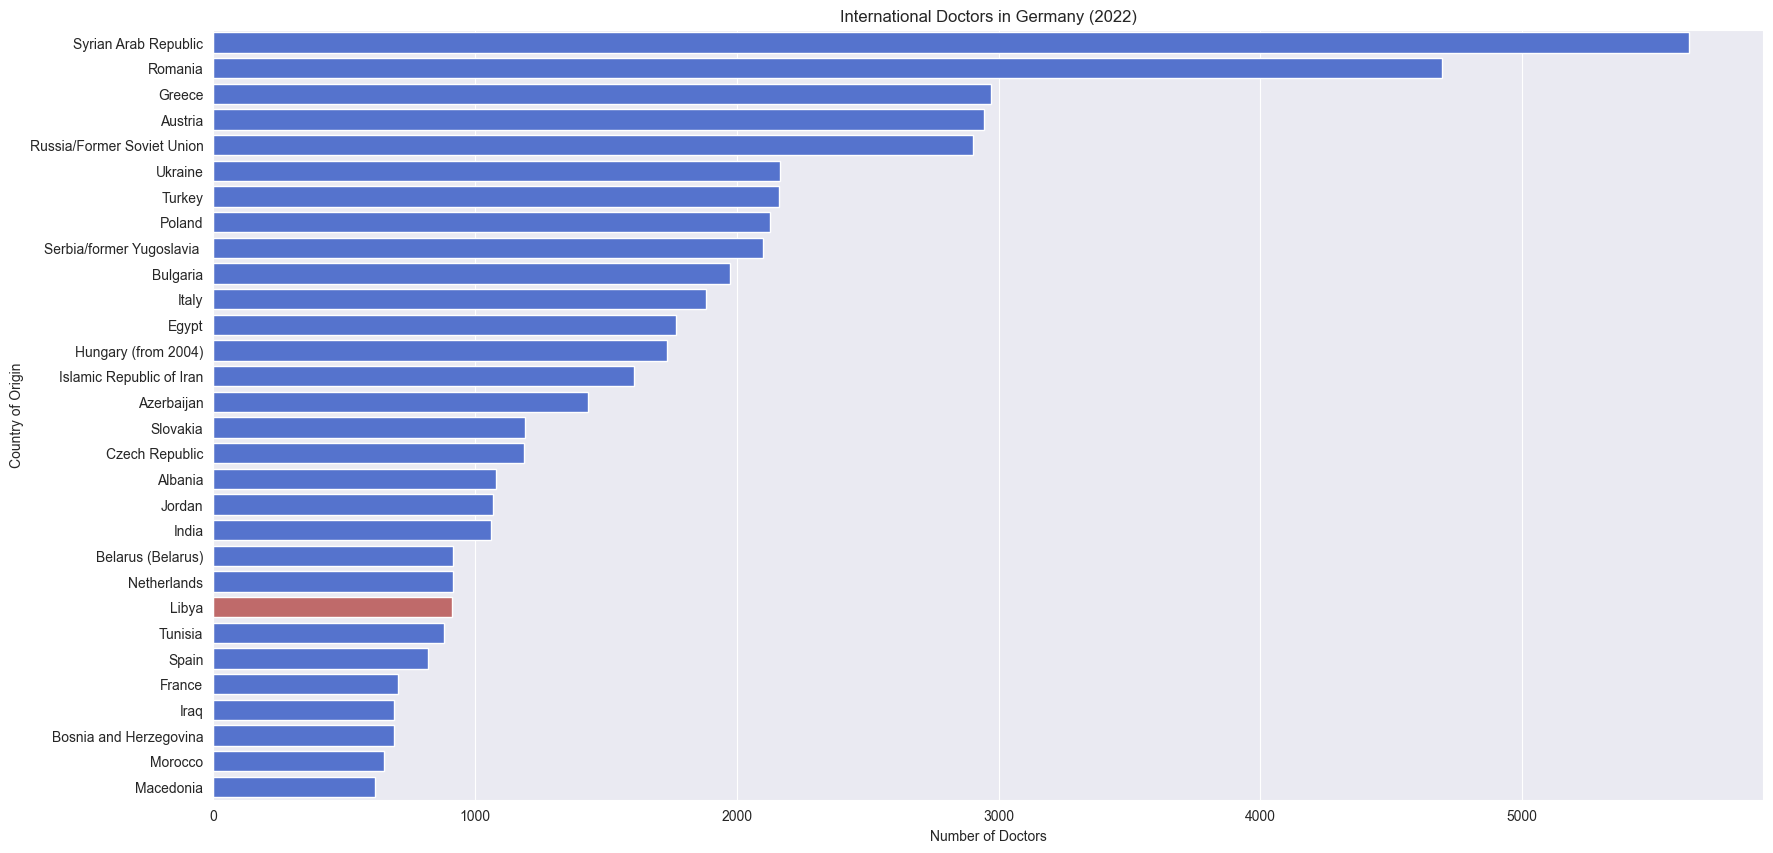

In [183]:

plt.figure(figsize = (20, 10))

clrs = ['indianred' if (a == 'Libya') else 'royalblue' for a in World_Top_Ten['Country'] ]

sbn.barplot(x = '2022', y = 'Country', data = World_Top_Ten , palette = clrs);

plt.title("International Doctors in Germany (2022)")
plt.xlabel("Number of Doctors")
plt.ylabel("Country of Origin")

9. Using a barplot to show the top 30 countries of orign of doctors in Germany in 2012.

   As shown Libya came in 16th place.
  

[]

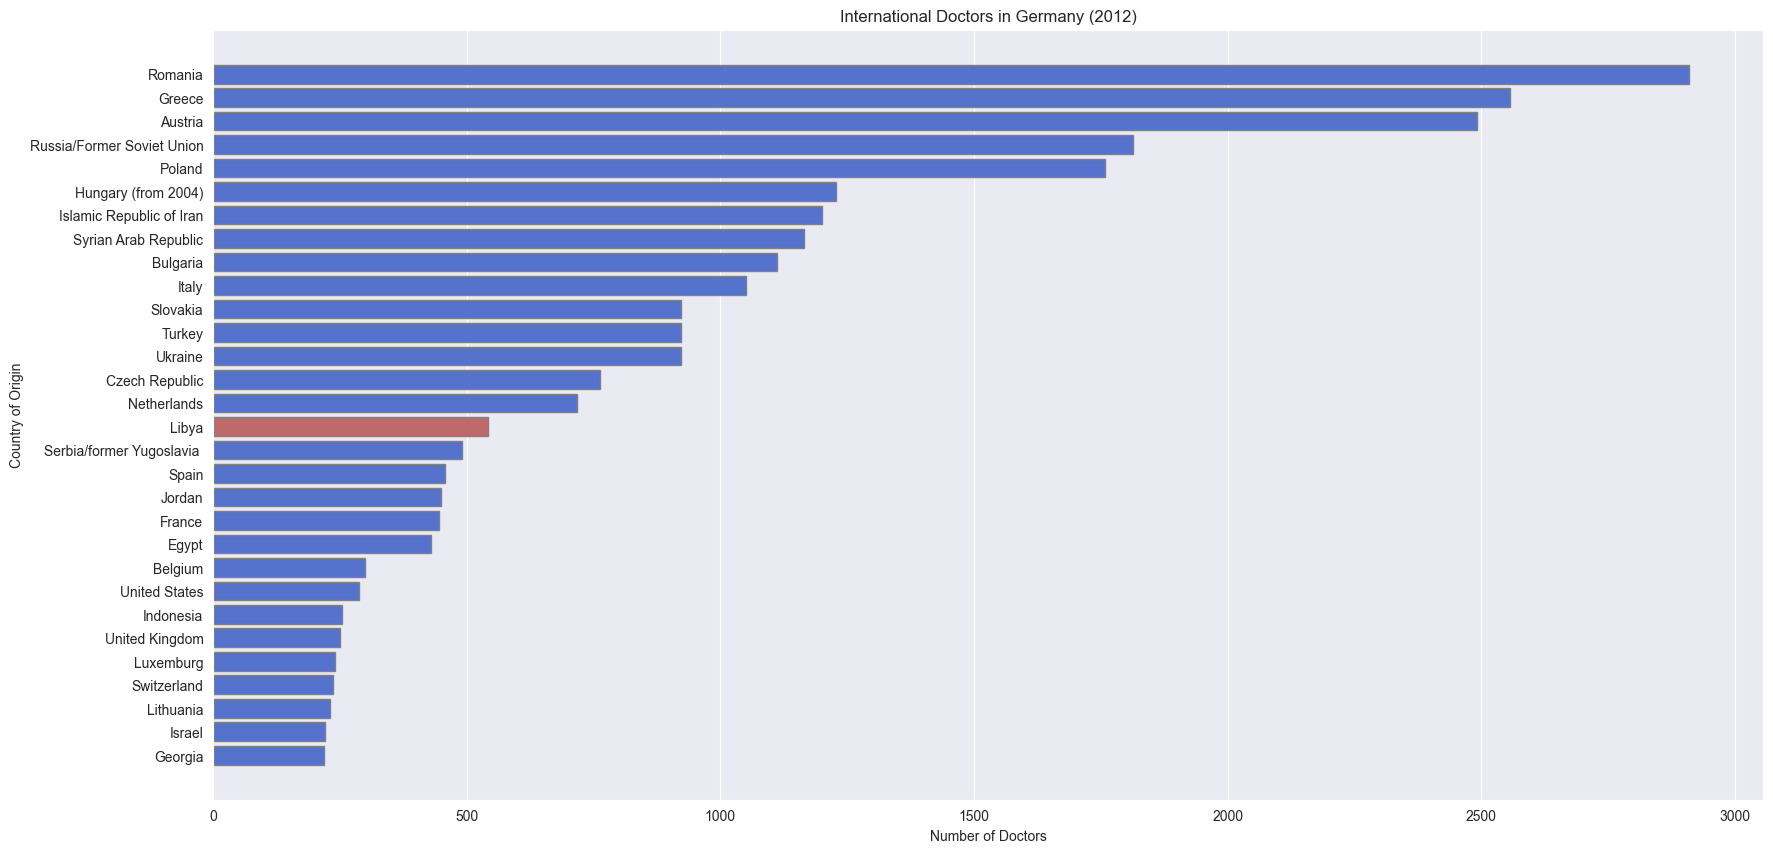

In [182]:
World_Top_Ten2012 = WorldData.sort_values("2012", ascending=False)

World_Top_Ten2012 = World_Top_Ten2012[['Country', '2012']]
World_Top_Ten2012 = World_Top_Ten2012.head(30)

plt.figure(figsize = (20, 10))

clrs = ['indianred' if (a == 'Libya') else 'royalblue' for a in World_Top_Ten2012['Country'] ]

sbn.barplot(x = '2012', y = 'Country', data = World_Top_Ten2012 , palette = clrs, edgecolor = 'gray');


plt.title("International Doctors in Germany (2012)")
plt.xlabel("Number of Doctors")
plt.ylabel("Country of Origin")
plt.plot()

10. When using a barplot to show the top 30 countries of orign of doctors in Germany in 2002.

    Libya came in 28th place.

Text(0, 0.5, 'Country of Origin')

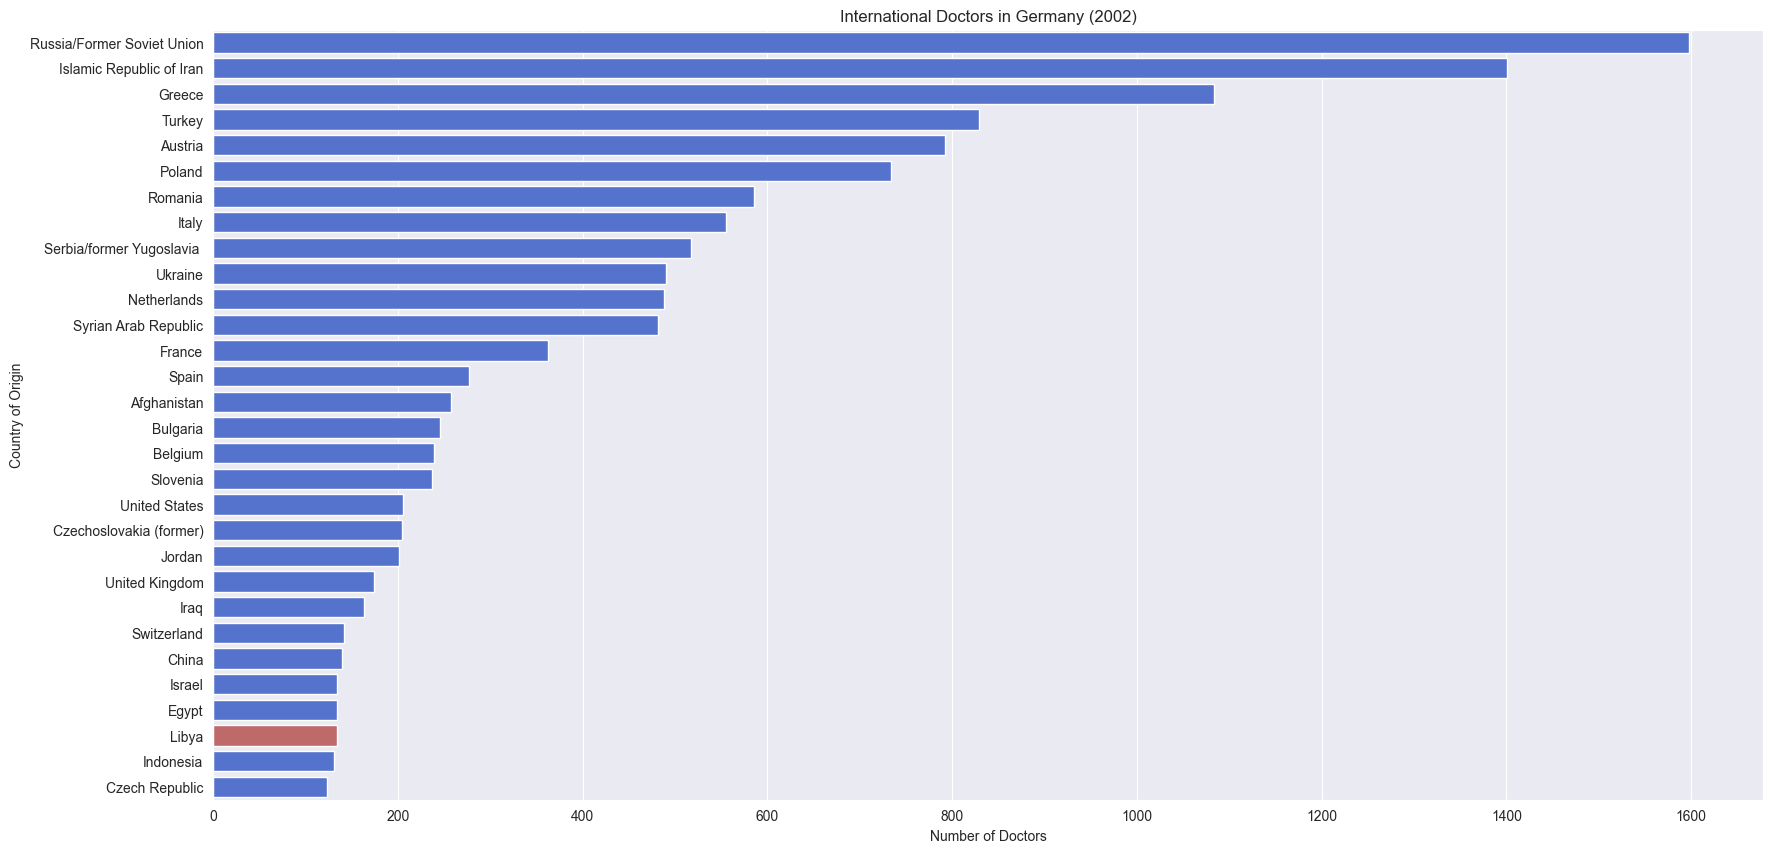

In [181]:
World_Top_Ten2002 = WorldData.sort_values("2002", ascending=False)

World_Top_Ten2002 = World_Top_Ten2002[['Country', '2002']]
World_Top_Ten2002 = World_Top_Ten2002.head(30)

plt.figure(figsize = (20, 10))

clrs = ['indianred' if (a == 'Libya') else 'royalblue' for a in World_Top_Ten2002['Country'] ]

sbn.barplot(x = '2002', y = 'Country', data = World_Top_Ten2002 , palette = clrs);

plt.title("International Doctors in Germany (2002)")
plt.xlabel("Number of Doctors")
plt.ylabel("Country of Origin")

11. Ploting the distribution of Libyan doctors between 1991 and 2022. 

In [165]:
# Assign the row [23] for Libya Data to the LibyaData variable
LibyaData = WorldData.loc[23]

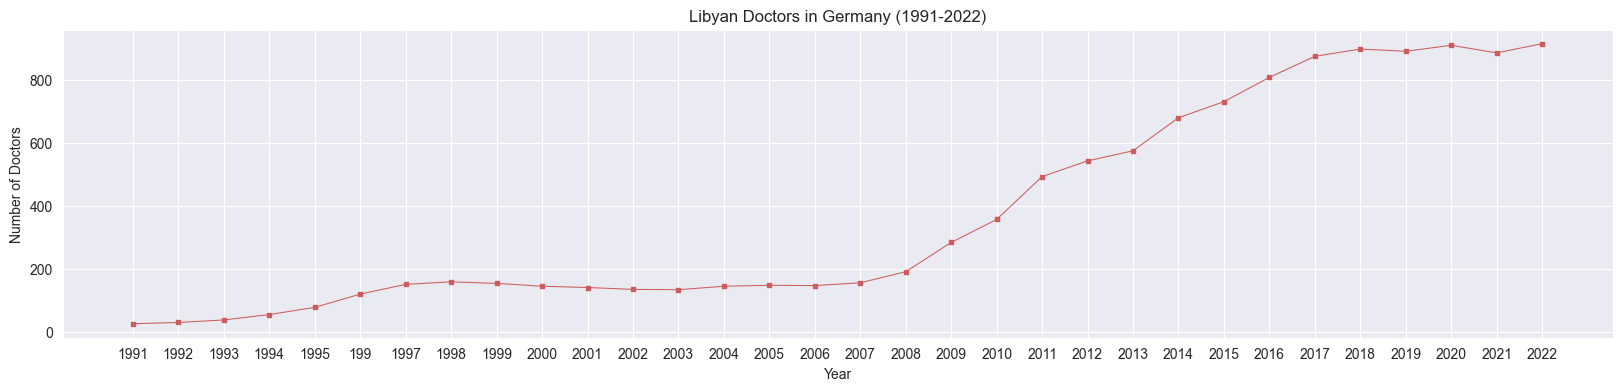

In [172]:
LYD = LibyaData[['1991', '1992', '1993', '1994', '1995', '199','1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

sbn.set_style('darkgrid')
plt.figure(figsize = (20, 4))
plt.plot( LYD, marker='s', c='indianred', ls='-', lw=0.75, ms=3, mew=1, mec='indianred')
plt.title("Libyan Doctors in Germany (1991-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Doctors")
plt.show()

12. Ploting the distribution of doctors in Germany by Continent. 

    As seen from the graph Europe has the highest number of doctors followed by Asia and Africa respectivly.

In [167]:
ContinentData = pd.read_csv('ContinentsData.csv', index_col=['Continent'])

ContinentData = ContinentData.drop("Unnamed: 0", axis='columns')

ContinentData.head(6)

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
All countries,10653.0,11405.0,11963.0,12356.0,12727.0,13564.0,13769.0,13836.0,14243.0,14603.0,15143.0,16160.0,17318.0,17991.0,18582.0,19513.0,20434.0,21784.0,23469.0,25316.0,28355.0,32548.0,35893.0,39661.0,42604.0,46722.0,50808.0,54377.0,58167.0,62598.0,63076.0,66885.0
Africa,530.0,571.0,598.0,630.0,630.0,697.0,723.0,724.0,730.0,695.0,758.0,789.0,786.0,820.0,813.0,832.0,850.0,916.0,1028.0,1164.0,1369.0,1586.0,1823.0,2259.0,2584.0,2987.0,3430.0,3826.0,4277.0,4830.0,5207.0,5625.0
America,560.0,594.0,617.0,603.0,593.0,617.0,620.0,601.0,608.0,600.0,584.0,613.0,643.0,655.0,655.0,685.0,710.0,722.0,771.0,796.0,853.0,934.0,1032.0,1162.0,1287.0,1458.0,1651.0,1852.0,2080.0,2422.0,2633.0,2906.0
Asia,2715.0,2926.0,3063.0,3152.0,3191.0,3349.0,3397.0,3440.0,3561.0,3576.0,3603.0,3715.0,3770.0,3808.0,3818.0,3937.0,3994.0,4163.0,4401.0,4641.0,5043.0,5886.0,6435.0,7292.0,8371.0,9972.0,11519.0,12753.0,14141.0,15525.0,16159.0,17151.0
Australia and Oceania,5.0,10.0,9.0,11.0,10.0,13.0,15.0,12.0,11.0,13.0,15.0,14.0,12.0,17.0,15.0,15.0,17.0,17.0,18.0,19.0,23.0,27.0,31.0,33.0,34.0,35.0,41.0,36.0,42.0,42.0,48.0,50.0
Europe,6600.0,7011.0,7416.0,7688.0,8055.0,8511.0,8711.0,8783.0,9076.0,9416.0,9859.0,10711.0,11811.0,12414.0,13025.0,13795.0,14626.0,15724.0,16993.0,18472.0,20855.0,23870.0,26315.0,28676.0,30097.0,32057.0,33956.0,35708.0,37398.0,39058.0,38861.0,40925.0


In [168]:
FiveData = ContinentData.loc['Africa':'Europe']

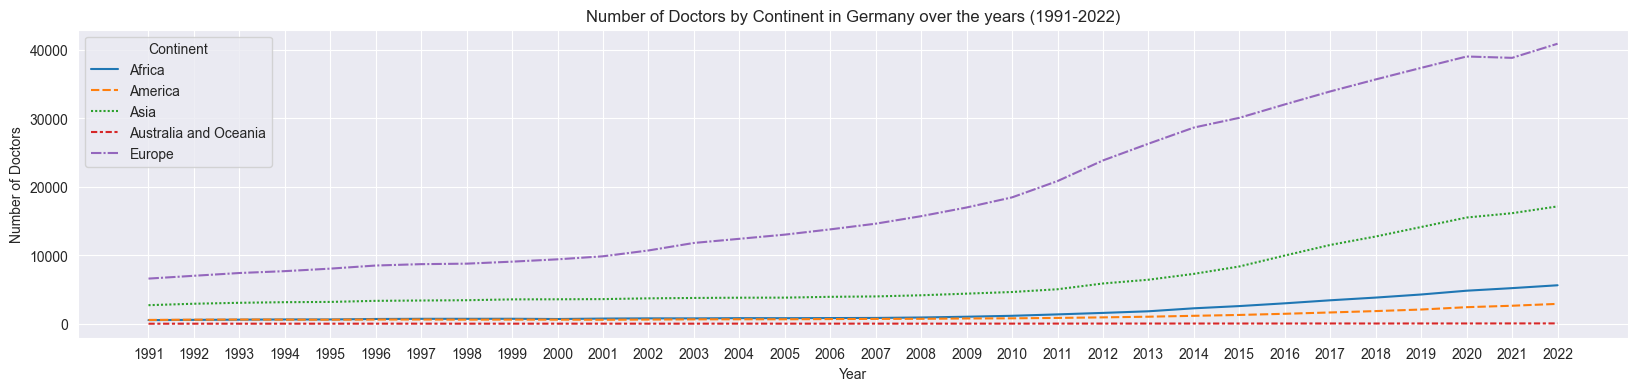

In [169]:
Five = FiveData[['1991', '1992', '1993', '1994', '1995', '1996','1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

plt.figure(figsize = (20, 4))
sbn.lineplot(data = Five.transpose())
plt.title("Number of Doctors by Continent in Germany over the years (1991-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Doctors")
plt.show()

13. Showing the top ten 

In [170]:
AfricaData = pd.read_csv('AfricaData.csv')

AfricaData = AfricaData.drop("Unnamed: 0", axis='columns')

AfricaData.head(5)

,Africa,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Egypt,111.0,124.0,118.0,121.0,110.0,122.0,124.0,114.0,119.0,108.0,120.0,134.0,124.0,126.0,131.0,138.0,150.0,161.0,186.0,228.0,289.0,429.0,580.0,778.0,903.0,1049.0,1226.0,1361.0,1549.0,1698.0,1717.0,1767.0
1,Algeria,9.0,8.0,10.0,12.0,14.0,19.0,20.0,28.0,32.0,27.0,27.0,27.0,28.0,30.0,29.0,24.0,22.0,21.0,21.0,23.0,22.0,19.0,27.0,34.0,42.0,52.0,69.0,108.0,135.0,205.0,276.0,337.0
2,Angola,1.0,7.0,8.0,7.0,9.0,7.0,8.0,7.0,8.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0
3,Equatorial Guinea,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ethiopia,61.0,72.0,83.0,84.0,72.0,63.0,51.0,50.0,46.0,42.0,45.0,39.0,43.0,41.0,35.0,39.0,41.0,43.0,38.0,38.0,34.0,32.0,26.0,28.0,34.0,31.0,33.0,32.0,33.0,35.0,30.0,26.0


Text(0, 0.5, 'Country of Origin')

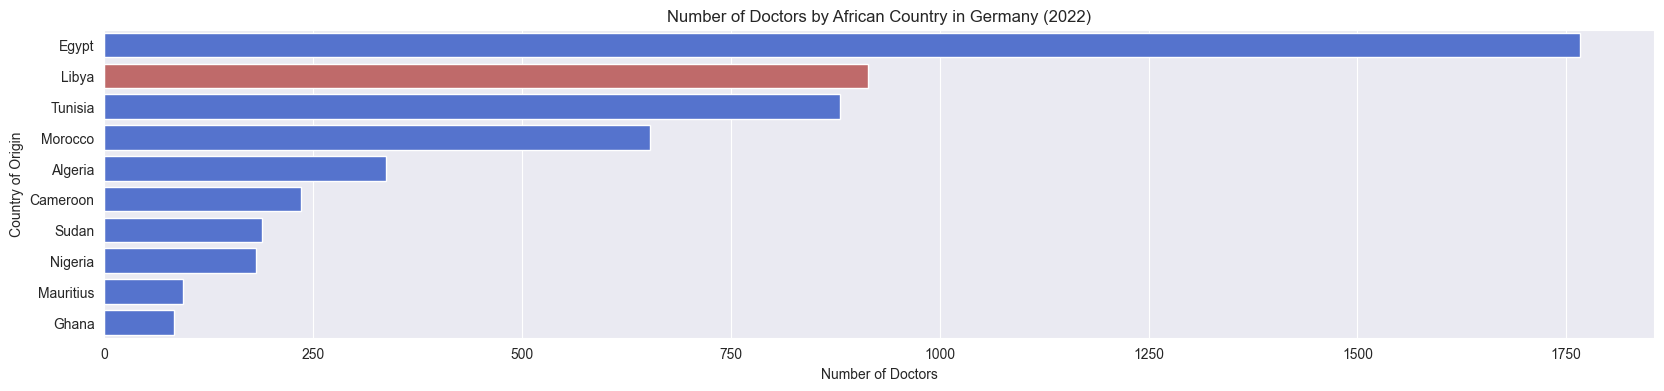

In [218]:
Africa_Top_Ten2022 = AfricaData.sort_values("2022", ascending=False)

Africa_Top_Ten2022 = Africa_Top_Ten2022[['Africa', '2022']]
Africa_Top_Ten2022 = Africa_Top_Ten2022.head(10)

plt.figure(figsize = (20, 4))

clrs = ['indianred' if (a == 'Libya') else 'royalblue' for a in Africa_Top_Ten2022['Africa'] ]

sbn.barplot(x = '2022', y = 'Africa', data = Africa_Top_Ten2022 , palette = clrs);

plt.title("Number of Doctors by African Country in Germany (2022)")
plt.xlabel("Number of Doctors")
plt.ylabel("Country of Origin")

In [208]:
LibyaDoctorsByRegion = pd.read_csv('LibyanDoctorsByRegion.csv')

LibyaDoctorsByRegion = LibyaDoctorsByRegion.drop("Unnamed: 0", axis='columns')


LibyaDoctorsByRegion.head(5)

,Libyan Doctors By Region,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Baden0Württemberg,2.0,1.0,2.0,2.0,3.0,2.0,7.0,11.0,14.0,14.0,17.0,20.0,15.0,17.0,15.0,21.0,26.0,28.0,40.0,39.0,45.0,40.0,22.0,35.0,42.0,44.0,52.0,55.0,50.0,54.0,56.0,60.0
1,Bavaria,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,4.0,6.0,6.0,4.0,2.0,1.0,2.0,2.0,4.0,5.0,11.0,10.0,11.0,19.0,16.0,20.0,25.0,32.0,26.0,26.0,33.0,40.0,52.0
2,Berlin,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,4.0,4.0,5.0,7.0,7.0,5.0,4.0,4.0,11.0,16.0,31.0,38.0,55.0,48.0,53.0,49.0,44.0,31.0,36.0,28.0,26.0,24.0,24.0,30.0
3,Brandenburg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,10.0,15.0,14.0,18.0,21.0,21.0,23.0,21.0
4,Bremen,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,4.0,6.0,7.0,10.0,25.0,35.0,20.0,12.0,10.0,10.0,11.0,13.0,14.0,18.0,22.0,19.0,18.0


Text(0, 0.5, 'Country of Origin')

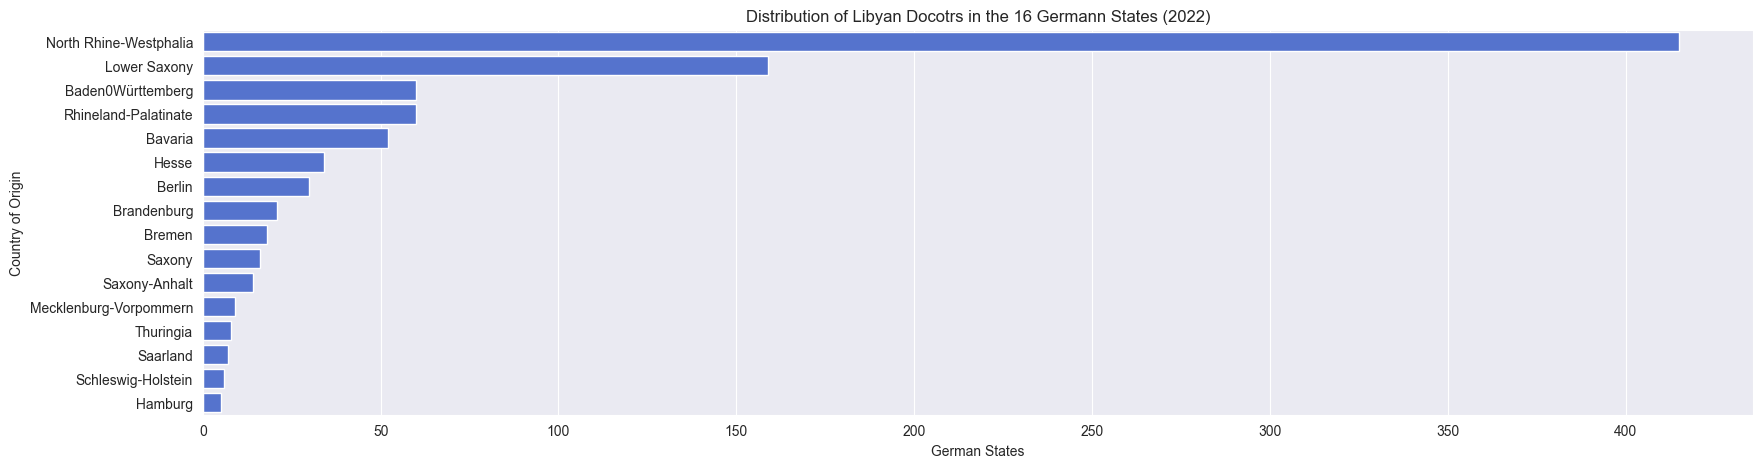

In [221]:
plt.figure(figsize = (20, 5))

LibyaDoctorsByRegion10 = LibyaDoctorsByRegion.sort_values("2022", ascending=False)

sbn.barplot(x = '2022', y = 'Libyan Doctors By Region', data = LibyaDoctorsByRegion10 , color = 'royalblue');

plt.title("Distribution of Libyan Docotrs in the 16 Germann States (2022)")
plt.xlabel("German States")
plt.ylabel("Country of Origin")

In [210]:
German_States = json.load(open("GermanStates.json", "r"))

In [211]:
LibyaDoctorsByRegion['id'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [212]:
import nbformat
fig = px.choropleth_mapbox(
    LibyaDoctorsByRegion,
    locations="id",
    geojson=German_States,
    color="2022",
    hover_name="Libyan Doctors By Region",
    hover_data=["2022"],
    title="Libyan Doctors Density in German States 2022",
    mapbox_style="carto-positron",
    center={"lat": 50, "lon": 18},
    zoom=3.3,
    opacity=0.5,
)
fig.show()

<Axes: >

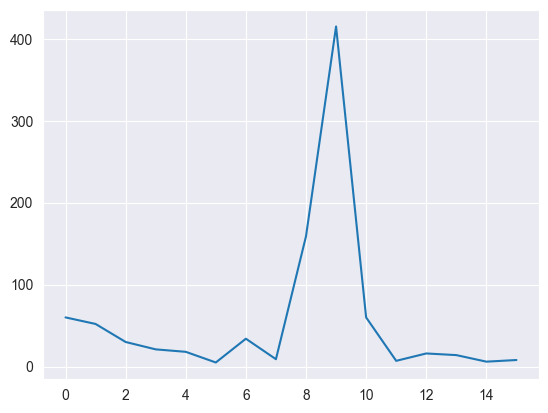

In [213]:
LibyaDoctorsByRegion["2022"].plot()

In [214]:
LibyaDoctorsByRegion["2022 Scale"] = np.log10(LibyaDoctorsByRegion["2022"])


<Axes: >

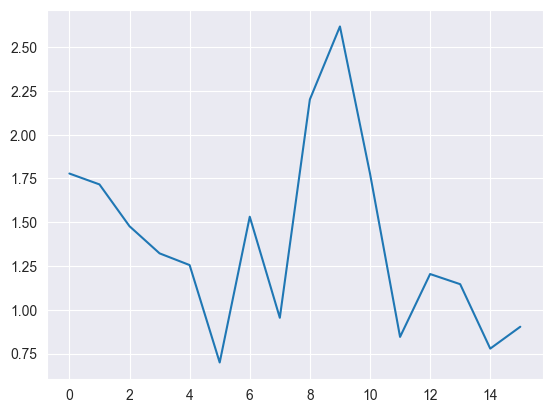

In [215]:
LibyaDoctorsByRegion["2022 Scale"].plot()

In [216]:
import nbformat
fig = px.choropleth_mapbox(
    LibyaDoctorsByRegion,
    locations="id",
    geojson=German_States,
    color="2022 Scale",
    hover_name="Libyan Doctors By Region",
    hover_data=["2022"],
    title="Libyan Doctors Density in German States 2022",
    mapbox_style="carto-positron",
    center={"lat": 50, "lon": 18},
    zoom=3.3,
    opacity=0.5,
)
fig.show()

References:

[1] https://www.gbe-bund.de/gbe/pkg_isgbe5.prc_menu_olap?p_uid=gast&p_aid=14504208&p_sprache=D&p_help=1&p_indnr=302&p_indsp=&p_ityp=H&p_fid=
[2] https://maps.infoware.de/MapAPI-1.3/docs/showcase/display-geojson-data/polygons/index.html

[3] https://matplotlib.org/3.1.0/gallery/color/named_colors.html
